In [26]:
import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt 

# Alucar - Analisando as vendas

In [47]:
alucar=pd.read_csv('dados/alucar.csv') 
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Time Series são coleções de dados em relação ao tempo

In [18]:
print('Quantidade de linhas e colunas:', alucar.shape)
print('Quantidade de dados nulos:', alucar.isna().sum().sum())
print('Tipos de Dados:\n', alucar.dtypes)

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0
Tipos de Dados:
 mes       object
vendas     int64
dtype: object


In [21]:
# Modificar mes para datetime
alucar['mes']= pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

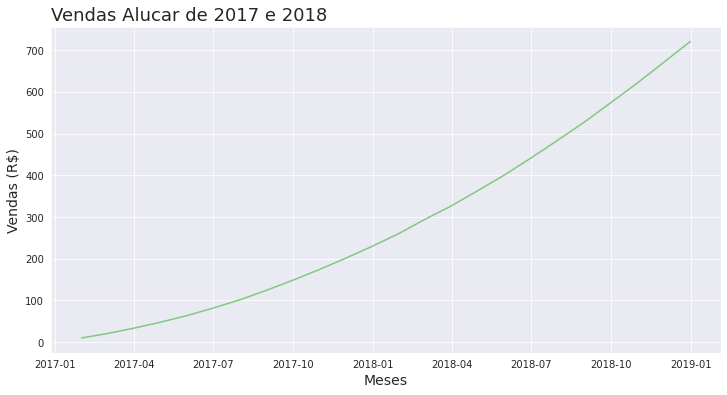

In [46]:
# STYLE GUIDE: https://urbaninstitute.github.io/graphics-styleguide/
sns.set_palette('Accent')
sns.set_style('darkgrid')
alucar_line=sns.lineplot(x='mes', y='vendas', data=alucar)
alucar_line.figure.set_size_inches(12,6)
alucar_line.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
alucar_line.set_xlabel('Meses', fontsize=14)
alucar_line.set_ylabel('Vendas (R$)', fontsize=14)
alucar_line=alucar_line